# 　　Build your `Recurrent Neural Network (RNN)` for Deep Learning
# 　　　　　　on Stock Price `Time-Series Forecasting` Task

## Annotations in cell of this Notebook: 
 
<font color='red'>Read CAREFULLY the Annotations below to understand what to write in the Notebook and what to answer in the Course Shell.</font>
 
 `##` is the python comments for assignment requirements and/or descriptions to the code below.

`???` is the marker of the place that you should REPLACE with your own python code (either name of function[s], name of variable[s], expression[s], or a whole code line etc.), which should be able to be executed without errors. <strong>You may also find some inspirations from previous HomeWork assignment to write desired code for similar purpose/functionality </strong>

`##-Qx: ` is the numbered identifier to indicate the question you should answer in the Course Shell for this homework. For example    `##-Q1: ` and `##-Q6: ` .   

[`clickable link`]() is some tip/hint resources you many refer to in addition to your learning resources from this course or your self explorations.  
    

 

## Task Overview 
<img src="https://svencarlin.com/wp-content/uploads/2020/02/bac-stock.png" width="500">
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　<strong>An Example Stock Chart</strong>
                                              
The Recurrent Neural Networks (RNNs) are in form of advanced neural networks which have internal memories that are capable of processing long sequences. This makes RNN very suitable for forecasting or predicting an outcome that relies on some form of historical context. The Time-series forecasting is to predict future values based on previously observed values in the time sequence. These all make the Stock Price Forecasting a fascinating application for RNN to work with its long historical data in the form of sequence of time.   

You will resolve a `Stock Price Forecasting` task, which is to predict the future value based on a sequence of previously observed values, by building an architecture of a `Recurrent Neural Network`(`RNN`), `implementing` with Python, and `training` your model on a set of time-series stock price data as a supervised learning procedure. Finally, you will `evaluate` your model's accuracy using test dataset.

The `TensorFlow 2.x` platform and its integrated version of `Keras API` (versus the traditional Keras Package) should be the handy tools for you to complete this task. Please take advantage of the official well supported TensorFlow & Keras [`Help Documentations`](https://www.tensorflow.org/api_docs/python/tf/keras) for correct usages of the API and functions. 


## Setup Development Environment

##### Import Modules/Packages 

In [ ]:
## Import related Modules for TensorFlow framework and Keras API

import tensorflow as tf

from tensorflow import keras 

## import the namespace "layers" and "optimizer" of Keras from Tensorflow    
##-Q1: copy your correct code in the line below to answer corresponding question in the Course Shell

from tensorflow.keras import layers, optimizers

import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt   

##### Module/Package **installation**

 `scikit-learn` is an open source Machine Learning Python package that offers many useful functionalities.
 
 **If** it shows `sklearn` Module is `not found` after executing the previous notebook cell
 
 - Execute the following code in the Python commend to install the sklearn package 
 
 - If any other Modules are indicated as `not found`, also install them

 - After installation, select from menu `Kernel > Restart & Clear Output` to start over this notebook

In [ ]:
# pip install scikit-learn

##### **Check the version** of TensorFlow and Numpy package 

Print to see version information of Numpy and Tensorflow.

- **If** your `Numpy` version > 1.19, while the `Tensorflow` version < 2.5.               
Then you may need to execute the following code in the python comment to install Numpy 1.19, in order to be compatible with the Tensorflow       
     
     

- **Otherwise**, you could keep on for now, and no need to install Numpy 1.19 until you really encounter the error message like below, which could happen during the `model fitting/training` procedure           
```
Cannot convert a symbolic Tensor to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
```
This issue is caused by uncompatible versions among Numpy and Tensorflow.
So if the error message shows up, you can execute the following code in commend to install Numpy 1.19 
     
     
     
- **If** you installed the lower version of Numpy, after installation, you need to select from menu `Kernel > Restart & Clear Output`, and then start over this notebook

In [ ]:
print("Using TensorFlow version = %s" % tf.__version__)
print("Using Numpy version= %s" % np.__version__)

Using TensorFlow version = 2.12.0
Using Numpy version= 1.22.4


In [ ]:
# !pip install numpy==1.19.5 --no-warn-script-location --user

## Prepare Data

### The Stock Price data composition - Introduction 

Stock price data come in several different [flavors](https://analyzingalpha.com/open-high-low-close-stocks). They are:

- `Open`: Opening stock price at the beginning of the trading day
- `Close`: Closing stock price at the end of the trading day
- `High`: Highest stock price among the trading day
- `Low`: Lowest stock price among the trading day
- `Volume`: Total amount of trading activity 

The provided stock price data file contains the stock price data for **ONE** stock,             
It has a record **each trading day**, for **10 years** from `2011-05-18` until `2021-05-18`           
Erach record has these above mentioned attributes         .
 

***   *NOTE: weekends and holidays are not trading days.*




### Load Data

Load the provided stock price data

  

In [ ]:
## The URL of provided data
DATA_URL = "https://tinyurl.com/StockDataCSV"

## `Pandas` is a popular tool to validate, visualize, and analyze financial market data 
## Load the data from online using function `read_csv` from `Pandas` Module
data = pd.read_csv(DATA_URL) 

###  Explore Data

The function `read_csv` will load a CSV file into a tabular datatype called `DataFrame`, and afterwards you would be able to easily manipulate the data in a DataFrame with various functions from `Pandas`.

The following quick introductory resources are highly recommended if you are new to `Pandas`.

- [Tutorial: 10 Popular Questions for DataFrame](https://blog.jetbrains.com/datalore/2021/02/25/pandas-tutorial-10-popular-questions-for-python-data-frames/) 
- [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) 

 

##### Find out dimensions of the `data`  
The variable `data` is now assigned with the stock price data in the form of `DataFrame`.     

Please use DataFrame's Attribute 
- [shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#Attributes)          
to find out the dimension of the `data`

In [ ]:
## develop your code below:
print(data.shape)

##-Q2: According to the dimension you obtained, 
##     what is the total number of records/samples in this data? -- In another word, how many days' records did you obtain? 2428
print("Total number of records/samples in the data: ", data.shape[0])

(2428, 8)
Total number of records/samples in the data:  2428


##### Display pieces of the `data`

Please use DataFrame's Methods 
- [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#Methods) and 
- [tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#Methods)         

to explore and get your first impression from pieces of the data


In [ ]:
## Display first five rows in the `data` 
data.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,88,2011-05-18,120.646,125.574,127.178,120.646,62165.0,600519
1,89,2011-05-19,126.250,128.749,129.889,126.250,85738.0,600519
2,90,2011-05-20,129.277,129.361,129.896,128.060,40043.0,600519
3,91,2011-05-23,128.827,126.913,130.598,126.894,39420.0,600519
4,92,2011-05-24,125.934,125.355,127.216,125.284,23997.0,600519


In [ ]:
## Display last five rows in the `data` 
data.tail()

,Unnamed: 0,date,open,close,high,low,volume,code
2423,2511,2021-05-12,1949.08,1984.00,1999.00,1949.00,32699.0,600519
2424,2512,2021-05-13,1965.75,1971.50,1985.05,1953.00,25078.0,600519
2425,2513,2021-05-14,1982.00,2009.85,2030.50,1976.00,35611.0,600519
2426,2514,2021-05-17,2025.10,2057.96,2085.20,2025.10,44524.0,600519
2427,2515,2021-05-18,2065.00,2059.31,2077.00,2045.06,17504.0,600519


In [ ]:

##-Q3: What is the stock price of the `closing stock price` on `2021-05-18`?    2059.31  


##### Display the chart of close price of this stock in 10 years span

Executing the below code to gain a whole picture of all cloding stock price from all records.

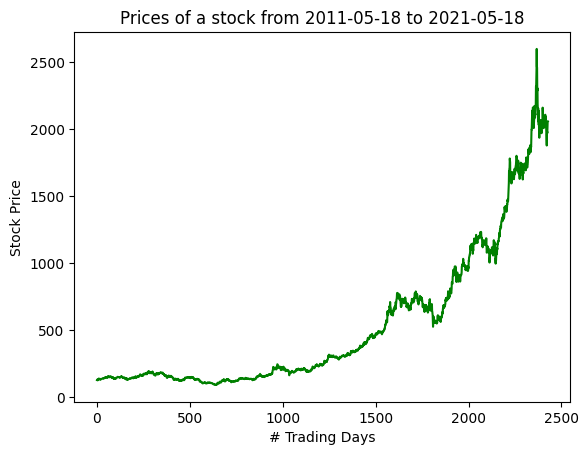

In [ ]:
plt.plot(data['close'], color='green') 
plt.title('Prices of a stock from 2011-05-18 to 2021-05-18')
plt.xlabel('# Trading Days')
plt.ylabel('Stock Price') 
plt.show()

### Preprocess the data

##### Compose training data and test data by splitting the loaded data

Let's use data of 9 yeas of trading days  for training, and 1 year of trading days' data for testing.

Assume we have an average of **22 trading days per month**.

Split the `data` variable into `data_train` and `data_test` using Pandas function `iloc` [ [1](https://blog.jetbrains.com/datalore/2021/02/25/pandas-tutorial-10-popular-questions-for-python-data-frames/), [2](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) ]. 
   
   
We will target the `Close` stock price value for training and prediction.
   

In [ ]:
## Assign the number of records (i.e. trading days) available in the data, to the variable below: 
days_total = data.shape[0]   # 2428


## Assign the number of trading days of 1 year based on the assumption mentioned above (avg. 22 trading days per month), 
##   to the variable below: 
days_oneYear = 264


##-Q4: According to the assumption, how many trading days/records we assume be in 1 year?   264
##     We will use that amount of data as test data
 
 
## The `close` price is located in the 4th column in the DataFrame `data` 
## Assign the column index to the variable below:
idx = 3

       
##-Q5: What is the value assigned to variable `idx`, 
##     to indicate the `close` price column in the DataFrame `data`? 3


## Complete the code line below to slice out, using `iloc` function, only the column that contains the close prices
##   and its 9 years of trading days' record to be the training data, the rest to be the test data

## data splitted for training
data_train = data.iloc[0 : days_total-days_oneYear, idx:idx+1].values  

## data splitted for test
data_test  = data.iloc[days_total-days_oneYear: , idx:idx+1].values    


##-Q6: What is the code you write to replace the first ??? in the above code line?  data.iloc[days_total-days_oneYear: , idx:idx+1].values 
##     i.e. in the code line:  data_test = data.iloc[??? : , ???:???].values


**Explore** the **splitted** data `data_train` and `data_test`

For example:

What is the data type of the `data_train` and `data_test`?               
- tips: use Python built-in function `type()` to expolore the datatype 

What is the dimensions of the `data_train` and `data_test`?       
- tips: use proper way, according to their datatype, to find out the dimensions
 

In [ ]:
## Datatype of `data_train` and `data_test`
print(type(data_train))
print(type(data_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
## Dimensions of the `data_train` and `data_test`
print("Dimensions of data_train:", data_train.shape)
print("Dimensions of data_test:", data_test.shape)

Dimensions of data_train: (2164, 1)
Dimensions of data_test: (264, 1)


##### Normalizing the data

Now we need to define a scaler to normalize the data for boosting the model performance.

The function [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) that we imported from `sklearn` package can assist us conveniently `scale` all the data to be in the range of 0 and 1, 

and can also be used to `scale back` the scaled data to their original scale when they need to be presented.

In [ ]:
## Create a `scaler` for scaling the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

## calculate the `scaler` based on the training data     
scaler.fit(data_train)  

## Apply the `scaler` upon the training data to normalize the values of `data_train` being between 0 and 1  
data_train_scaled = scaler.transform(data_train) 

## Build architecture of your RNN model

The basic building block of a neural network is the layer.

You will configure each layer of your model, then compile the model.

<br>
<br>

For this task you are required to chain together layers as the architecture of the RNN:

  [3 types of `RNN layers`](https://www.tensorflow.org/guide/keras/rnn) can be implemented in Keras   

   - [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)
   - [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
   - [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
 

  [the `Dropout` layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) can be used to improve model performance

<br>
<br>
In the end, you will get one output from your model, representing the stock price of the following day, which is predicted based on the sequencial stock prices from the previous days.



##### Stack and Configure layers

In [ ]:
# Build a tf.keras.Sequential model by stacking layers as your RNN model

model = keras.Sequential([
    
    ## Construct a First `basic simple RNN` layer that has 80 hidden unit, 
    ##   using `tanh` as activation function, 
    ##   set True for parameter `return_sequences` in order to stack to the next RNN layer 
    layers.SimpleRNN(units=80, activation='tanh', return_sequences=True),

    
    ##-Q7: copy your correct code in the line above to answer corresponding question in the Course Shell
    #      What is the code line you developed to construct the first RNN layer according to the requirements in the comment?
        
    
    ## Apply a Droupout layer only to the non-recurrent connections to reduce overfitting     
    ##   and set the rate to be 0.2 of the input units for dropping out        

   layers.Dropout(rate=0.2),
    
    ##    ============= be CAREFULL to follow the Different requirements in the COMMENTS  =============
    
    
    ## Construct a Second basic simple RNN layer that has    100    hidden unit, 
    ##   using tanh as activation function, 
    ##   set True for `return_sequences` to stack to the next RNN layer 
    layers.SimpleRNN(units=100, activation='tanh', return_sequences=True),

    
    ## Apply a Droupout layer with a rate    0.5    for dropping out
    layers.Dropout(rate=0.5),
    
    ## Construct a Last basic simple RNN layer that has    120    hidden unit, 
    ##   using tanh as activation function, 
    ##   set     False     for `return_sequences` as no more stacking RNN layer 
    layers.SimpleRNN(units=120, activation='tanh', return_sequences=False),
  
    
    ## Apply a Droupout layer with a rate    0.5    for dropping out   
    layers.Dropout(rate=0.5),

    
    ## Apply a `full-connected` output layer with a unit that can predict the price of next day            
    layers.Dense(units=1)     
    
    ##-Q8: What are the code you should put in place of the ??? in the above code line (i.e.: ???.???(units=???) ),
    ##     to fulfill its purpose of design (requirements in the comment)? layers.Dense(units=1)
    
])



##### Compile the model

Before the model is ready for training, it needs a few more settings. These are to be added during the [model's compiling](https://www.tensorflow.org/api_docs/python/tf/keras/Model) step:

- [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) : This is how the model is updated based on the data it sees and its loss function.
- [Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) : Used to monitor the training and testing steps.  

In [ ]:
## Select an optimizer that implements the Adam algorithm, 
##   and validate to update a proper learning rate for your model during the model tunning step
my_learn_rate = 0.001
my_optimizer = optimizers.Adam(learning_rate=my_learn_rate)  ## utilize existed variable when available
 
##-Q9: What is the code you fill in the 1st and 2nd ??? in the above code line (to fulfill its requirements in the comment)? Adam
## (hint: for the 3rd ??? guess a value for now, and tune later together with the   batch size   and   epochs value   in later code blocks) 



## Compile your model with the chosen optimizer, 
##   mean of squares of errors as losses (since it is a regression task), and/or your choice of metric(s)
model.compile(optimizer=my_optimizer,
              loss=keras.losses.mean_squared_error
             ) 

##-Q10: What is the code you fill in the ???s in the above code line (to fulfill its requirements in the comment)? model.compile(optimizer=my_optimizer,loss=keras.losses.mean_squared_error) 

## Fit/Train the model

Train the model to fit the training dataset

#### Compose traning dataset out of the data_train

We design and apply **this schema** for stock price forcasting:             
```
Use the stock price of trading days in the past month to predict the stock price of next 1 day.
```      

* In another word, every `22 days` as `timesteps` to be 1 training record/sample, to train for the `1 next day` which serves as the corresponding label.     

The training dataset will be composed by extracting all the qualified records/samples and their corresponding labels, accoridng to the above designed schema, from the previous splitted and processed training data `data_train_scaled`

In [ ]:
## Create lists to store extracted training record set and traning label set.
pastDays_trainSet = []
label_trainSet = []

## Assign the number of days used in one training record 
pastDaysRange = 22

## Loop to Extract all records/samples from `data_train_scaled` to form a training record set,
##   do the same for all corresponding labels to form training label set,
##   Each extraction has `pastDaysRange` days as one record, and 1 next day as label 
for nextDay in range(pastDaysRange, data_train_scaled.size):
    pastDays_trainSet.append(data_train_scaled[nextDay-pastDaysRange : nextDay, 0])
    label_trainSet.append(data_train_scaled[nextDay, 0])

## Convert the set lists to numpy array in order to work with model built in Keras 
pastDays_trainSet, label_trainSet = np.array(pastDays_trainSet), np.array(label_trainSet) 

##-Q11: What is function name of Numpy you use to convert a list ot a numpy array?  array


Check the shape of the extracted record set and label set for traning, according to their data type:

In [ ]:
## Check the dimensions of the training record set `pastDays_trainSet` and traning label set `nextDay_trainSet`
print("Training record set dimension:", pastDays_trainSet.shape)
print("Training label set dimension:", label_trainSet.shape)

##-Q12: how many records/samples you have generated in the training record set 
##      to form (together with the label set) a training dataset later? 2134

Training record set dimension: (2142, 22)
Training label set dimension: (2142,)


##### Reshape the dimension of training record set

Use a function of Numpy to reshape the training record set to satisfy the model accepted format `[#sample, #timesteps, #feature]` 

    * we are using only closing stock price as the training feature

In [ ]:
## Reshape `pastDays_trainSet`
 
pastDays_trainSet = np.reshape(pastDays_trainSet, (pastDays_trainSet.shape[0], pastDaysRange, 1))

##-Q13: What is the code you write to replace the 1st and 3rd ??? in the above code line? np.reshape(pastDays_trainSet, (pastDays_trainSet.shape[0], pastDaysRange, 1))

##### Construct the training dataset 

Create the training dataset `dataset_train` from both the training record set `pastDays_trainSet` and traning label set `nextDay_trainSet`         
Then, Shuffle and Batch the `dataset_train` for the model

In [ ]:
## Construct a Tensorflow Dataset as training dataset composed by training record set and training label set. 
dataset_train = tf.data.Dataset.from_tensor_slices((pastDays_trainSet, label_trainSet))  
   
## Set number of records for the shuffle (you will shuffle all records in the training record set)
train_record_count = len(pastDays_trainSet)

## Decide a proper value of batch size for your model training 
train_batch_size = 32  
## (hint: decide a value for now, and tune later together with the   learning rate value (in the previous code block) and   epochs value  (in next code block) ) 

## Randomly shuffle and batch the dataset
dataset_train = dataset_train.shuffle(train_record_count).batch(train_batch_size)

#### Train your model
Feed the train dataset to the model and let it  [fit to associate ](https://www.tensorflow.org/api_docs/python/tf/keras/Model)  stock prices of past days and stock price of next day

In [ ]:
## Decide a proper value of epoch for your model training 
epochs_count = 20
## (hint: guess a proper value for now, and tune later together with the   learning rate value   and   batch size value  (in the later code blocks) ) 

 
## Feed in the training dataset to train model
model.fit(dataset_train, epochs=epochs_count)
## If you encounter error "Cannot convert a symbolic Tensor to a numpy array." at this step when executing your developed code above,
##    go to the beginning of this notebook in the Setup Enviroment section to install lower version of Numpy 

##-Q14: What is the code you write to replace the 2nd and 4th ???s in the above code line? model.fit(dataset_train, epochs=epochs_count)
 

Epoch 1/20
67/67 [==============================] - 10s 57ms/step - loss: 0.4122
Epoch 2/20
67/67 [==============================] - 5s 72ms/step - loss: 0.1273
Epoch 3/20
67/67 [==============================] - 4s 56ms/step - loss: 0.0756
Epoch 4/20
67/67 [==============================] - 4s 53ms/step - loss: 0.0524
Epoch 5/20
67/67 [==============================] - 2s 27ms/step - loss: 0.0381
Epoch 6/20
67/67 [==============================] - 2s 27ms/step - loss: 0.0286
Epoch 7/20
67/67 [==============================] - 2s 26ms/step - loss: 0.0230
Epoch 8/20
67/67 [==============================] - 2s 27ms/step - loss: 0.0193
Epoch 9/20
67/67 [==============================] - 2s 33ms/step - loss: 0.0161
Epoch 10/20
67/67 [==============================] - 2s 35ms/step - loss: 0.0131
Epoch 11/20
67/67 [==============================] - 2s 27ms/step - loss: 0.0126
Epoch 12/20
67/67 [==============================] - 2s 27ms/step - loss: 0.0114
Epoch 13/20
67/67 [=================

## Tuning your Model

Adjust the values of hyperparameters such as `learning rate`, `batch size`, and `epochs` in your above codes, together with the help of model evaluation on the test dataset in the later procedure, to improve and achieve a training result that has **loss at least less than 0.01**

##### Display the architecture of your model 

In [ ]:
## You may run a summary description on the architecture of the RNN model you build.
model.summary()

##-Q15: How many parameters in total have been learned druing your model training : 51301

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 22, 80)            6560      
                                                                 
 dropout (Dropout)           (None, 22, 80)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 22, 100)           18100     
                                                                 
 dropout_1 (Dropout)         (None, 22, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 120)               26520     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

## Evaluate/Test the trained model

Evaluates your trained model based on the test dataset to see how the model performs, with your different tunning choices, to aim at reaching better performance

#### Compose test dataset out of the `data_test`

Apply the same data processing procedure (that has been applied in creating the `training dataset`) to generate `test dataset`

The procedure would include some following steps:

- You will need to **normalize** the test data by the same scaler calculated on the train data     

- After then, **extract** test records and test labels from previously splitted test data, to get test record set and test label set           

- You will also need to **reshape** the test record set to satisfy the model acceptable dimension, same as which has done for the training record set

- Then **generate** the test dataset composed by test record set and test label set.

- Have the test dataset **batched** for the model evaluation


In [ ]:
## Apply also the already calculated scaler to normalize the test data 
data_test_scaled = scaler.transform(data_test)


## Create lists to store extracted test record set and test label set.
pastDays_testSet = []
labels_testSet = []

## Loop according to the same schema, to Extract all records/samples from `data_test_scaled` to form a test record set,
##   do the same for all corresponding labels to form test label set,
##   Each extraction has the same `pastDaysRange` days as one record, and 1 next day as label  

for i in range(pastDaysRange, len(data_test_scaled)):
    pastDays_testSet.append(data_test_scaled[i-pastDaysRange:i, :])
    labels_testSet.append(data_test_scaled[i, 0])


## Convert the test record and label set from lists datatype to numpy array in order to work with model built in Keras 

pastDays_testSet = np.array(pastDays_testSet)
labels_testSet = np.array(labels_testSet)

##-Q16: how many records/samples you have generated in the test record set `pastDays_testSet`
##      to form (together with the label set) a test dataset `pastDays_testSet` later? 234

num_test_samples = len(pastDays_testSet)
print("Number of test samples: ", num_test_samples)


## Use a function of Numpy to reshape the test record set to satisfy the model accepted format `[#sample, #timesteps, #feature]` 
##   we are using only closing stock price as the training feature
pastDays_testSet = np.reshape(pastDays_testSet, (pastDays_testSet.shape[0], pastDays_testSet.shape[1], 1))

Number of test samples:  242


In [ ]:
## Construct a Tensorflow Dataset as `test dataset` composed by test record set and test label set.  
dataset_test = tf.data.Dataset.from_tensor_slices((pastDays_testSet, labels_testSet))

## Test dataset does not need shuffle, only need to have all in one batch
## Decide a proper value of batch size to have all in one batch 
test_batch_size = len(labels_testSet) 

## Batch the test dataset 
dataset_test = dataset_test.batch(test_batch_size) 

##-Q17: What is the code you fill in the ???s in the above code line (to fulfill its requirements in the comments)? dataset_test.batch(test_batch_size)


##### evaluate your trained model
Feed the obtained test dataset to the model and   [evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model) your model on the test dataset 

In [ ]:
## Evaluate model
model.evaluate(dataset_test)

##-Q18: What is the function name to fill in the second ??? in the above code line? evaluate

1/1 [==============================] - 0s 452ms/step - loss: 0.0179


0.017931902781128883

##### Predict stock price on test record data

Feed the test record set to the trained model to   [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model) the stock price in last year (i.e. the 1 year prepared as the test dataset.

In [ ]:
## Predict on the test record set to compare with the test label set later 
predicted_stock_prices = model.predict(pastDays_testSet) 
 
##-Q19: What is the function name to fill in the second ??? in the above code line? predict
 

8/8 [==============================] - 0s 11ms/step


##### inverse-scale the forcasted price

Since the predicted prices are all scaled,      
to obtain their values in the original scale for comparison with the real last year stock price,      
we need to inverse scale them. 


In [ ]:
## Apply the calculated scaler to inverse-scale the predicted price back to the original actual price scale
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

In [ ]:
## Extract the original real stock price from splitted test data and slice to start at the same day of predicted prices
real_stock_prices = data_test[pastDaysRange:]


##### Comparative plot 
Plot the predicted results VS. the real label prices for comparison

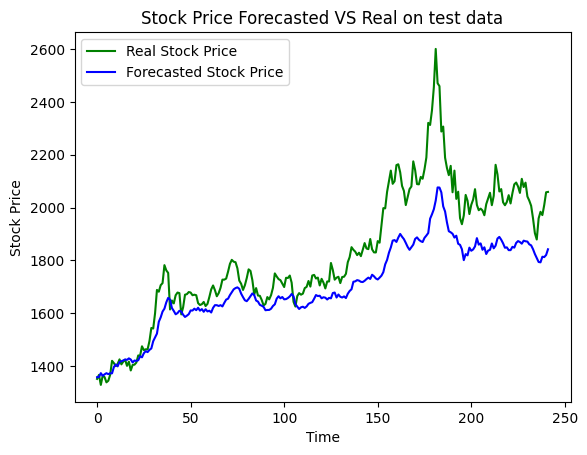

In [ ]:
## Plot the comparative chart
plt.plot(real_stock_prices, color='green', label='Real Stock Price')
plt.plot(predicted_stock_prices, color='blue', label='Forecasted Stock Price')
plt.title('Stock Price Forecasted VS Real on test data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()